# Tensors

Основним типом даних PyTorch є тензор (tensor).


**Тензори** — це спеціалізовані структури даних, дуже схожі на масиви та матриці. У PyTorch ми використовуємо тензори для кодування входів і виходів моделі, а також параметрів моделі.

Тензори схожі на багатовимірні масиви бібліотеки NumPy (ndarrays), за винятком того, що тензори можуть працювати на графічних процесорах або інших апаратних прискорювачах. Тензори також оптимізовані для автоматичного диференціювання.



In [3]:
import torch
import numpy as np

## Initialization

In [4]:
# Ініціалізація тензора
# Найпростішим способом створення тензора є виклик torch.empty().
x = torch.empty(3, 4)
print(type(x))
print(x)
# Створений тензор має 3 рядки та 4 стовпці.
# Тип повернутого об’єкта – torch.Tensor, який є псевдонімом для torch.FloatTensor.
# За замовчуванням тензори PyTorch заповнюються 32-розрядними числами з плаваючою комою.
# 💡 Виклик torch.empty() виділяє пам’ять для тензора, але не ініціалізує його жодними значеннями – тому ви бачите те, що було в пам’яті на момент її виділення.

<class 'torch.Tensor'>
tensor([[ 3.3631e-44,  0.0000e+00, -8.2030e-01,  4.4735e-41],
        [ 1.4013e-45,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 5.6052e-45,  0.0000e+00,  5.6052e-45,  7.0065e-45]])


In [5]:
# Одновимірний тензор також називають вектором. Двовимірний — матрицею. Усі масиви більше двох вимірів — тензором.

# Найчастіше ви захочете ініціалізувати свій тензор певними значенням. Типовими випадками є всі нулі, усі одиниці або випадкові значення:
zeros = torch.zeros(2, 3)
print(zeros)

ones = torch.ones(2, 3)
print(ones)

torch.manual_seed(1729)
random = torch.rand(2, 3)
print(random)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])


In [6]:
# Випадкові тензори та seeding
# Ініціалізація тензорів, таких як ваги моделі, випадковими значеннями є звичайним явищем,
# але бувають випадки, особливо в дослідницьких умовах, коли потрібна впевненість у відтворюваності результатів.
# Це можна зробити, встановивши початкове значення генератора випадкових чисел вручну.
torch.manual_seed(1729)
random1 = torch.rand(2, 3)
print(random1)

random2 = torch.rand(2, 3)
print(random2)

torch.manual_seed(1729)
random3 = torch.rand(2, 3)
print(random3)

random4 = torch.rand(2, 3)
print(random4)
# random1 і random3 мають ідентичні значення, як і random2 і random4.
# Встановлення початкового числа вручну скидає його, так що ідентичні обчислення залежно від випадкового числа мають у більшості налаштувань забезпечувати ідентичні результати.

tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])


In [8]:
# Розмірність тензорів
# Часто при виконанні операцій над двома чи більше тензорами, вони повинні мати однакову форму,
# тобто мати однакову кількість вимірів і однакову кількість комірок у кожному вимірі.

# Для створення тензору, який має таку ж саму кількість вимірів і кількість комірок, як і вже існуюючий тензор, існують методи torch.*_like():

x = torch.empty(2, 2, 3)
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)
# Властивість .shape містить список розмірів кожного виміру тензора — у нашому випадку x є тривимірним тензором форми 2 x 2 x 3.
# Вище ми викликаємо методи .empty_like(), .zeros_like(), .ones_like() і .rand_like().
# Використовуючи властивість .shape, ми можемо перевірити, що кожен із цих методів повертає тензор ідентичної розмірності.

torch.Size([2, 2, 3])
tensor([[[0.0000e+00, 0.0000e+00, 7.7052e+31],
         [7.2148e+22, 1.5766e-19, 1.0256e-08]],

        [[2.5783e-09, 3.1128e+12, 6.9362e-07],
         [2.7005e-06, 6.6754e-07, 1.2609e+16]]])
torch.Size([2, 2, 3])
tensor([[[-1.3158e+00,  4.4735e-41,  4.9757e-01],
         [ 3.0964e-41,  5.1844e-01,  3.0964e-41]],

        [[ 4.9753e-01,  3.0964e-41,  0.0000e+00],
         [ 0.0000e+00,  4.9780e-01,  3.0964e-41]]])
torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([2, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
torch.Size([2, 2, 3])
tensor([[[0.5062, 0.8469, 0.2588],
         [0.2707, 0.4115, 0.6839]],

        [[0.0703, 0.5105, 0.9451],
         [0.2359, 0.1979, 0.3327]]])


In [9]:
# Також тензори можна створювати безпосередньо з даних. Тип даних визначається автоматично.
some_constants = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
print(some_constants)

some_integers = torch.tensor((2, 3, 5, 7, 11, 13, 17, 19))
print(some_integers)

more_integers = torch.tensor(((2, 4, 6), [3, 6, 9]))
print(more_integers)
# torch.tensor() створює копію даних

tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])
tensor([ 2,  3,  5,  7, 11, 13, 17, 19])
tensor([[2, 4, 6],
        [3, 6, 9]])


## Attributes

Характеристики тензора

In [10]:
# Типи даних
# Встановити тип даних тензора можна кількома способами:
a = torch.ones((2, 3), dtype=torch.int16)
print(a)

b = torch.rand((2, 3), dtype=torch.float64) * 20.
print(b)

c = b.to(torch.int32)
print(c)
# Найпростіший спосіб встановити тип даних тензора — за допомогою необов’язкового аргументу dtype під час створення.
# Інший спосіб - метод .to(). У комірці вище ми створюємо випадковий тензор b з плаваючою комою звичайним способом.
#    Після цього ми створюємо c, перетворюючи b на 32-розрядне ціле число за допомогою методу .to().
#   (c містить усі ті самі значення, що й b, але скорочені до цілих чисел.)

# Доступні типи даних PyTorch включають: torch.bool, torch.int8, torch.uint8, torch.int16, torch.int32, torch.int64, torch.half, torch.float, torch.double, torch.bfloat.

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[18.3283,  0.2118, 18.4972],
        [ 9.8370,  3.8937, 16.1945]], dtype=torch.float64)
tensor([[18,  0, 18],
        [ 9,  3, 16]], dtype=torch.int32)


In [11]:
# Атрибути тензора
# Атрибути тензора описують їх форму, тип даних і пристрій, на якому вони зберігаються.

tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Operations

Математика та логіка

In [12]:
# Розглянемо базову арифметику та те, як тензори взаємодіють із простими скалярами.
ones = torch.zeros(2, 2) + 1
twos = torch.ones(2, 2) * 2
threes = (torch.ones(2, 2) * 7 - 1) / 2
fours = twos ** 2
sqrt2s = twos ** 0.5

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)
# Арифметичні операції між тензорами та скалярами, такі як додавання, віднімання, множення, ділення та піднесення до ступеня, розподілені по кожному елементу тензора.
# Оскільки результатом такої операції буде тензор, можна об’єднати їх разом із звичайними правилами пріоритету операторів, як у рядку, де ми створюємо threes.

tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[3., 3.],
        [3., 3.]])
tensor([[4., 4.],
        [4., 4.]])
tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])


In [13]:
# Подібні операції між двома тензорами також поводяться інтуїтивно:
powers2 = twos ** torch.tensor([[1, 2], [3, 4]])
print(powers2)

fives = ones + fours
print(fives)

dozens = threes * fours
print(dozens)

tensor([[ 2.,  4.],
        [ 8., 16.]])
tensor([[5., 5.],
        [5., 5.]])
tensor([[12., 12.],
        [12., 12.]])


In [14]:
# Важливо зазначити, що всі тензори в попередній комірці коду мали однакову форму.
# А що станеться, коли ми спробуємо виконати двійкову операцію над тензорами різної форми?
a = torch.rand(2, 3)
b = torch.rand(3, 2)

print(a * b)  # RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

#Індексування, нарізка, об’єднання та трансляція тензорів

In [15]:
# Стандартне numpy-подібне індексування та нарізка
# Індексування та нарізка (slicing) масивів в PyTorch ідентична до NumPy.
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [16]:
# Об’єднання тензорів
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6]])
# - torch.cat об’єднує послідовність тензорів уздовж виміру, що вже існує:
# Concatenate along the 0th dimension
result = torch.cat((x, y), dim=0)
print(result)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [19]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6], [3, 4]])
# - torch.stack об’єднує послідовність тензорів у новому вимірі, створюючи новий вимір в отриманому тензорі.
# функція stack очікує два аргументи — тензори однієї розмірності.
# Stack along a new dimension (dimension 0)
result = torch.stack((x, y), dim=0)
print(result)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [3, 4]]])


In [20]:
# Трансляція тензорів (tensor broadcasting)
# Винятком із правила однакових форм є трансляція тензорів:
rand = torch.rand(2, 4)
doubled = rand * (torch.ones(1, 4) * 2)

print(rand)
print(doubled)

tensor([[0.1332, 0.0023, 0.4945, 0.3857],
        [0.9883, 0.4762, 0.7242, 0.0776]])
tensor([[0.2663, 0.0045, 0.9890, 0.7715],
        [1.9767, 0.9524, 1.4484, 0.1553]])


Як ми можемо помножити тензор 2x4 на тензор 1x4?

**Трансляція** — це спосіб виконання операції між тензорами, які мають подібні форми. У наведеному вище прикладі тензор з одним рядком і чотирма стовпцями множиться на обидва рядки тензора з двома рядками і чотирма стовпцями.

Це важлива операція в Deep Learning. Звичайним прикладом є множення тензора вагових коефіцієнтів навчання на групу вхідних тензорів, застосування операції до кожного екземпляра в групі окремо та повернення тензора ідентичної форми. Так, у наведеному вище прикладі множення тензорів розмірами (2, 4) та (1, 4) було повернуто тензор форми (2, 4).

*Правила трансляції:*
- Кожен тензор повинен мати принаймні один вимір — ніяких порожніх тензорів.
- Порівняння розмірів двох тензорів від останнього до першого:
  - розміри вимірів мають бути рівними або
  - один із вимірів має розмір 1 або
  - розмірність не існує в одному з тензорів.

In [21]:
# Розглянемо декілька прикладів, які відповідають наведеним вище правилам і дозволяють трансляцію:
a = torch.ones(4, 3, 2)

b = a * torch.rand(   3, 2) # 3rd & 2nd dims identical to a, dim 1 absent
print(b)  # Операція множення, яка створила b, транслювалась на кожному «шарі» a.

c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a
print(c)  # Для c операція транслювалася над кожним шаром і рядком a — кожен 3-елементний стовпець ідентичний.

d = a * torch.rand(   1, 2) # 3rd dim identical to a, 2nd dim = 1
print(d) # Для d ми змінили його, тепер кожен рядок ідентичний у всіх шарах і стовпцях.

tensor([[[0.4004, 0.9877],
         [0.0352, 0.0905],
         [0.4485, 0.8740]],

        [[0.4004, 0.9877],
         [0.0352, 0.0905],
         [0.4485, 0.8740]],

        [[0.4004, 0.9877],
         [0.0352, 0.0905],
         [0.4485, 0.8740]],

        [[0.4004, 0.9877],
         [0.0352, 0.0905],
         [0.4485, 0.8740]]])
tensor([[[0.2526, 0.2526],
         [0.6923, 0.6923],
         [0.7545, 0.7545]],

        [[0.2526, 0.2526],
         [0.6923, 0.6923],
         [0.7545, 0.7545]],

        [[0.2526, 0.2526],
         [0.6923, 0.6923],
         [0.7545, 0.7545]],

        [[0.2526, 0.2526],
         [0.6923, 0.6923],
         [0.7545, 0.7545]]])
tensor([[[0.7746, 0.2330],
         [0.7746, 0.2330],
         [0.7746, 0.2330]],

        [[0.7746, 0.2330],
         [0.7746, 0.2330],
         [0.7746, 0.2330]],

        [[0.7746, 0.2330],
         [0.7746, 0.2330],
         [0.7746, 0.2330]],

        [[0.7746, 0.2330],
         [0.7746, 0.2330],
         [0.7746, 0.2330]]])


In [23]:
# Ось кілька прикладів невдалих спроб трансляції:
a = torch.ones(4, 3, 2)

b = a * torch.rand(4, 3)    # dimensions must match last-to-first
# # розміри повинні збігатися від останнього до першого

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 2

In [22]:
c = a * torch.rand(   2, 3) # both 3rd & 2nd dims different
# 3-й та 2-й димми різні

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 2

In [24]:
d = a * torch.rand((0, ))   # can't broadcast with an empty tensor
# не може транслювати з порожнім тензором

RuntimeError: The size of tensor a (2) must match the size of tensor b (0) at non-singleton dimension 2

# Інші операції з тензорами

In [25]:
# Одноелементні тензори
# Одноелементний тензор (отриманий, наприклад, шляхом об’єднання всіх значень тензора в одне значення), ви можете перетворити на числове значення Python за допомогою методу item().
agg = tensor.sum()
agg_item = agg.item()
# cuda - agg.cpu().item()
# propagated - agg.detach().item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [26]:
# Локальні операції (In-place operations)
# Операції, які зберігають результат в операнді, є локальними. Вони позначаються суфіксом _. Наприклад: *x.copy*(y), x.t_() змінить x.
print(f"{tensor} \n")
tensor.add_(5)  # inplace=True
print(tensor)
# Локальні операції економлять пам’ять, але можуть бути проблематичними під час обчислення похідних через втрату історії. Тому їх використання в таких випадках не рекомендується.

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## torch.tensor та numpy.array.

In [ ]:
# Тензори на CPU і масиви NumPy можуть спільно використовувати пам’ять, і зміна одного з масивів змінить інший.
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
# Зміна тензора відображається в масиві NumPy.
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [28]:
# Приведення масиву NumPy до tensor
n = np.ones(5)
t = torch.from_numpy(n)

In [32]:
# Зміни в масиві NumPy відображаються в тензорі.
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([5., 5., 5., 5., 5.], dtype=torch.float64)
n: [5. 5. 5. 5. 5.]


#  Операції на GPU

Кожну з розглянутих нами операцій можна виконувати на графічному процесорі (GPU)(зазвичай із вищою швидкістю, ніж на центральному процесорі (CPU)).

За замовчуванням тензори створюються на CPU. Нам потрібно явно перемістити тензори до GPU за допомогою методу .to (після перевірки доступності графічного процесора (GPU)).

(копіювання великих тензорів між пристроями може бути затратним з точки зору часу та пам’яті)

In [ ]:
# Переносимо наш тензор на графічний процесор (GPU), якщо він доступний
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

# Робота з розмірністю тензорів

In [33]:
# Іноді може виникнути потреба змінити форму тензора. Кілька поширених випадків і підходів до їх вирішення:
#   - Одним із випадків, коли вам може знадобитися змінити кількість вимірів, є передача єдиного екземпляра вхідних даних у вашу модель.
#     Моделі PyTorch зазвичай очікують батч даних (batches).
#     Обробка батчами (batch processing) — це техніка, яка зазвичай використовується в машинному та глибокому навчанні для навчання та передбачення.
#     Вона передбачає обробку кількох вхідних зразків (точок даних) одночасно, а не по одному.
#     Уявіть, що у вас є модель, яка працює на зображеннях розмірності 3 х 226 х 226. Тобто входом моделі є 226-піксельний квадрат з трьома кольоровими каналами.
#     Коли ви завантажуєте та перетворюєте його, ви отримаєте тензор форми (3, 226, 226).
#     Проте ваша модель очікує введення форми (N, 3, 226, 226), де N — кількість зображень у батчі.

# Отже, як зробити батч з одного зображення?
a = torch.rand(3, 226, 226)
b = a.unsqueeze(0)

print(a.shape)
print(b.shape)
# Метод unsqueeze() додає вимір розміру 1. unsqueeze(0) додає його як новий нульовий вимір — тепер ми маємо батч розміру 1.

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


In [34]:
# Продовжуючи наведений вище приклад, припустімо, що результатом моделі є 20-елементний вектор для кожного входу.
# Тоді ви очікуєте, що результат матиме форму (N, 20), де N — це кількість екземплярів у вхідному батчі.
# Це означає, що для батчу розміру 1 ми отримаємо вихідну форму (1, 20).
# Що робити у випадку, коли вам знадобиться зробити обчислення з самим результатом — 20-елементним вектором?
a = torch.rand(1, 20)
print(a.shape)
print(a)

b = a.squeeze(0)  # object[0]
print(b.shape)
print(b)

c = torch.rand(2, 2)
print(c.shape)

d = c.squeeze(0)
print(d.shape)
# Виклики squeeze() і unsqueeze() можуть діяти лише на вимірах розмірності 1, оскільки, інакше, зміниться кількість елементів у тензорі.

torch.Size([1, 20])
tensor([[0.9769, 0.2792, 0.3277, 0.5210, 0.7349, 0.7823, 0.8637, 0.1891, 0.3952,
         0.9176, 0.8960, 0.4887, 0.8625, 0.6191, 0.9935, 0.1844, 0.6138, 0.6854,
         0.0438, 0.0636]])
torch.Size([20])
tensor([0.9769, 0.2792, 0.3277, 0.5210, 0.7349, 0.7823, 0.8637, 0.1891, 0.3952,
        0.9176, 0.8960, 0.4887, 0.8625, 0.6191, 0.9935, 0.1844, 0.6138, 0.6854,
        0.0438, 0.0636])
torch.Size([2, 2])
torch.Size([2, 2])


In [ ]:
# Також можна використовувати unsqueeze() для полегшення трансляції:
a = torch.ones(4, 3, 2)

c = a * torch.rand(3, 1) # 3rd dim = 1, 2nd dim identical to a
print(c)

tensor([[[0.8669, 0.8669],
         [0.6005, 0.6005],
         [0.7996, 0.7996]],

        [[0.8669, 0.8669],
         [0.6005, 0.6005],
         [0.7996, 0.7996]],

        [[0.8669, 0.8669],
         [0.6005, 0.6005],
         [0.7996, 0.7996]],

        [[0.8669, 0.8669],
         [0.6005, 0.6005],
         [0.7996, 0.7996]]])


In [ ]:
# Маючи трансляцію операції над вимірами 0 і 2, випадковий тензор 3 x 1 множився поелементно на кожен 3-елементний стовпець у a.
# Що, якби випадковий вектор був просто 3-елементним? Ми втратили б можливість робити трансляцію, тому що кінцеві розміри не збігалися б з правилами трансляції.
# unsqueeze() приходить на допомогу:

a = torch.ones(4, 3, 2)
b = torch.rand(   3)     # trying to multiply a * b will give a runtime error
c = b.unsqueeze(1)       # change to a 2-dimensional tensor, adding new dim at the end
print(c.shape)
print(a * c)             # broadcasting works again!

torch.Size([3, 1])
tensor([[[0.4397, 0.4397],
         [0.7885, 0.7885],
         [0.0658, 0.0658]],

        [[0.4397, 0.4397],
         [0.7885, 0.7885],
         [0.0658, 0.0658]],

        [[0.4397, 0.4397],
         [0.7885, 0.7885],
         [0.0658, 0.0658]],

        [[0.4397, 0.4397],
         [0.7885, 0.7885],
         [0.0658, 0.0658]]])


In [35]:
# Іноді вам захочеться змінити форму тензора більш радикально, зберігаючи при цьому кількість елементів та їхній вміст.
# Один випадок, коли це відбувається, – це межа згорткового шару моделі та лінійного шару моделі. Це поширене явище в моделях класифікації зображень.

# Ядро згортки дасть вихідний тензор розмірністю [характеристики x ширина x висота], але наступний лінійний шар очікує одновимірного входу.
# Одновимірний результат можна отримати за допомогою операції reshape() за умови, що виміри, які ви хочете отримати, дають таку саму кількість елементів, яку має вхідний тензор:

output3d = torch.rand(6, 20, 20)
print(output3d.shape)

input1d = output3d.reshape(6 * 20 * 20)
print(input1d.shape)

# can also call it as a method on the torch module:
print(torch.reshape(output3d, (6 * 20 * 20,)).shape)
# Аргумент (6 * 20 * 20,) у останньому рядку комірки вище пояснюється тим, що PyTorch очікує кортеж, коли вказує форму тензора, але коли форма є першим аргументом методу.
# Це дозволяє нам «шахраювати» та з легкістю використовувати ряд цілих чисел.
# Тут нам довелося додати дужки та кому, щоб переконати метод, що це дійсно одноелементний кортеж.

# Якщо це можливо, reshape() поверне вигляд (view) тензора, який потрібно змінити, тобто окремий об’єкт тензора, що дивиться на ту саму базову область пам’яті.
# Це означає, що будь-які зміни, внесені до вихідного тензора, будуть відображені в поданні цього тензора, якщо ви не використаєте метод clone() для створення окремої копії.

torch.Size([6, 20, 20])
torch.Size([2400])
torch.Size([2400])


## Cuda routines

In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [ ]:
# practical aspects
# CPU-GPU interactions

torch.set_default_device("cuda")
# model and optimizer are automatically on cuda
# data are preprocessed to tensor on each batch step and deleted from cuda after iteration
# cleaning cuda
gc.collect()
torch.cuda.empty_cache()
# reset model
del globals()['model']


# Logistic regression with PyTorch

In [ ]:
# Побудуємо нейрону мережу, яку ми розбирали минулої теми, засобами PyTorch.
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Імпортуємо основні блоки, з яких можна будувати нейронну мережу: https://pytorch.org/docs/stable/nn.html
import torch
import torch.nn as nn
import torch.optim as optim

import warnings
# filter warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Procesing

In [ ]:
# Reading data

df = pd.read_csv('/content/drive/MyDrive/GoIT/MD NN/data/Module_1_Lecture_2_Class_Spaceship_Titanic.csv')
df = df.set_index('PassengerId')

TARGET = 'Transported'
FEATURES = [col for col in df.columns if col != TARGET]

In [ ]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy='median')
imputer.fit(df[imputer_cols])
df[imputer_cols] = imputer.transform(df[imputer_cols])

df["HomePlanet"].fillna('Gallifrey', inplace=True)
df["Destination"].fillna('Skaro', inplace=True)

df['CryoSleep_is_missing'] = df['CryoSleep'].isna().astype(int)
df['VIP_is_missing'] = df['VIP'].isna().astype(int)

df["CryoSleep"].fillna(False, inplace=True)
df["VIP"].fillna(False, inplace=True)

df["CryoSleep"] = df["CryoSleep"].astype(int)
df["VIP"] = df["VIP"].astype(int)

dummies = pd.get_dummies(df.loc[:, ['HomePlanet', 'Destination']], dtype=int)

df = pd.concat([df, dummies], axis=1)
df.drop(columns=['HomePlanet', 'Destination'], inplace=True)

df[TARGET] = df[TARGET].astype(int)

df.drop(["Name" ,"Cabin"] , axis=1 ,inplace = True)

In [ ]:
# Train/test split

X = df.drop(TARGET , axis =1 ).values
y = df[TARGET].values

X_train , X_test , y_train , y_test = train_test_split(X, y, random_state = 42, test_size =0.33, stratify=y)

In [ ]:
# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

## Layers use-cases

In [ ]:
# Лінійний шар (linear layer)
# Ініціалізувати ваги w та виконати лінійну трансформацію z=wTX+b в PyTorch можна викликом одного шару: torch.nn.Linear.
# torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)

# Основні параметри шару:
#   - in_features (int) – розмір кожного вхідного зразка (input sample);
#   - out_features (int) – розмір кожного вихідного зразка (output sample);
#   - bias (bool) – якщо встановлено False, шар не вивчатиме значення зміщення (за замовчуванням True).
# Ваги моделі wT  розмірності [out_features,in_features] ініціалізуються з рівномірного розподілу U(sqrt(−k)​, sqrt(k)), де k=1/in_features
# Зміщення b розмірності out_features ініціалізується так само.

m = nn.Linear(5, 3)
input = torch.randn(4, 5)
output = m(input)

print('Input:', input, f'shape {input.shape}', sep='\n')
print('\nOutput:', output, f'shape {output.shape}', sep='\n')

Input:
tensor([[-1.7147,  0.7230, -1.0887, -1.8443, -0.3506],
        [ 0.6184, -0.8416,  1.1644, -0.0788, -1.2134],
        [-0.9177, -1.2127, -0.7783, -0.2389,  0.2970],
        [-0.5581, -0.0832, -1.2347,  0.1729, -0.9737]])
shape torch.Size([4, 5])

Output:
tensor([[-0.3624, -0.0827, -0.4546],
        [-0.1828,  0.8314,  0.0186],
        [ 0.2619, -0.2953,  0.7269],
        [ 0.3132, -0.2962,  0.1374]], grad_fn=<AddmmBackward0>)
shape torch.Size([4, 3])


Лінійний шар m приймає на вхід матрицю X розмірністю [кількість вхідних значень, 5]. Тут кількість вхідних значень може бути будь-яким числом, а кількість ознак в матриці X визначено при ініціації шару першим аргументом.

Відповідно матриця X, що зберігається у змінній input, має розмірність 4 рядки (значення) та 5 стовпців (ознаки).

Матриця X проходить через лінійний шар, де множиться на матрицю ваг wT.

Матриця w має розмірність [3, 5], відповідно wT має розмірність [5, 3].

До отриманого результату розмірності [4, 3] додається вектор зміщення b розмірності [3]. Після чого маємо фінальний результат розмірності [4, 3].

Функція активації
Сигмоіда — це наша функція активації, реалізована в PyTorch як torch.sigmoid.

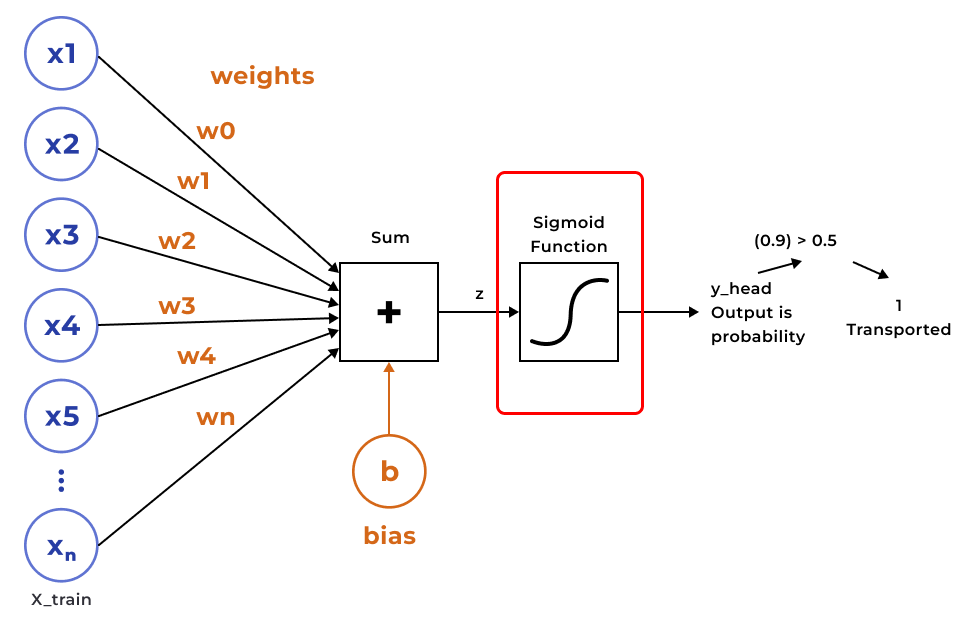

torch.sigmoid(*input*, *, *out=None)
Параметри
  - input (Tensor) – вхідний тензор;
  - out (Tensor, необов’язково) – вихідний тензор. Вихідним тензором може бути заздалегідь створений об’єкт torch.tensor, в який буде збережено результат розрахунку.

Дана функція розраховує значення за формулою y= 1/1+e−z.

In [ ]:
t = torch.randn(4)
print('Input: ', t)
print('Applying sigmoid: ', torch.sigmoid(t))
# Переконуємося, що після застосування сигмоїди усі змінні прийняли значення в діапазоні [0; 1]

Input:  tensor([-2.3622, -0.0953, -0.4675, -0.7296])
Applying sigmoid:  tensor([0.0861, 0.4762, 0.3852, 0.3253])


## Model

Перейдемо безпосередньо до створення моделі.

Модель (нейронна мережа) визначається в PyTorch за допомогою наслідування від базового класу nn.Module.

В методі __init__ визначаються шари, які будуть використані в моделі.

Обов’язковим для створення є метод forward. В ньому описується весь хід прямого розповсюдження.

Зворотне розповсюдження виконується практично автоматично. Про нього піде розмова трохи далі.

Визначимо клас логістичної регресії.

In [ ]:
# Define the logistic regression model

class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

# Оскільки ми вирішуємо задачу бінарної класифікації, нам достатньо тільки одного виходу лінійного шару (другий аргумент nn.Linear).
# Якби ми вирішували задачу багатокласової класифікації, кількість вихідних нейронів дорівнювала б кількості класів, які ми передбачаємо.

In [ ]:
# Продовжуємо використовувати дані, отримані в минулій темі.
# У ноутбуці до поточної теми є окремий блок із завантаженням та обробкою даних на випадок, якщо ви починаєте вивчення цієї теми з чистого ноутбука.

# Instantiate the model (Створимо екземпляр (instance) нашої моделі.)
input_dim = X_train.shape[1]
model = LogisticRegression(input_dim)

# Define loss function and optimizer
# (Визначаємо функцію втрат. Модуль nn містить в собі реалізовані функції втрат, в тому числі binary cross-entropy.)
criterion = nn.BCELoss()
# Окремо визначаємо оптимізатор.
# Оптимізатор — це об’єкт, який виконує оптимізацію заданого набору параметрів, щоб мінімізувати функцію втрат під час процесу навчання.
# Саме цей об’єкт відповідальний за розрахунок градієнтів та оновлення ваг.
optimizer = optim.SGD(model.parameters(), lr=0.001)
# Даний оптимізатор імплементує алгоритм стохастичного градієнтного спуску. Детальніше про реалізацію даного алгоритму можна прочитати на сторінці PyTorch.

In [ ]:
# Ми передаємо наступні аргументи optim.SGD: параметри моделі
#     - model.parameters
model.parameters

#     - швидкість навчання lr learning rate.
# Нагадаємо, що швидкість навчання є гіперпараметром, який визначає розмір кроків, зроблених під час оптимізації.
# Він контролює, наскільки ми коригуємо ваги нашої мережі щодо градієнта втрат.
# Ключові моменти:
#    - Якщо швидкість навчання надто велика (великий lr), алгоритм оптимізації може пропустити точку мінімуму функції втрат і не зійтися.
#    - Якщо швидкість навчання надто мала, процес оптимізації може тривати занадто довго або застрягти на неоптимальному рішенні.
#    - Швидкість навчання є гіперпараметром, який потрібно налаштовувати під час процесу навчання. Часто потрібно експериментувати,
#         щоб знайти оптимальне значення для конкретної проблеми.

<bound method Module.parameters of LogisticRegression(
  (linear): Linear(in_features=18, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)>

In [ ]:
# Train the model  (Фінально напишемо код самого тренування.)
num_epochs = 1000
model.train()
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [50/1000], Loss: 13.1716
Epoch [100/1000], Loss: 10.5802
Epoch [150/1000], Loss: 6.9151
Epoch [200/1000], Loss: 6.7186
Epoch [250/1000], Loss: 10.6229
Epoch [300/1000], Loss: 10.3805
Epoch [350/1000], Loss: 9.0771
Epoch [400/1000], Loss: 11.7551
Epoch [450/1000], Loss: 5.3225
Epoch [500/1000], Loss: 9.1028
Epoch [550/1000], Loss: 13.9416
Epoch [600/1000], Loss: 10.7550
Epoch [650/1000], Loss: 6.9020
Epoch [700/1000], Loss: 10.9197
Epoch [750/1000], Loss: 9.5650
Epoch [800/1000], Loss: 5.4181
Epoch [850/1000], Loss: 10.1670
Epoch [900/1000], Loss: 5.5901
Epoch [950/1000], Loss: 7.2358
Epoch [1000/1000], Loss: 9.2351


Для кожної епохи (повне проходження всього навчального набору даних) передбачено виконання наступних дій:

1. Розрахунок передбачання моделі y^ і збереження у змінну outputs.
2. Розрахунок значення функції втрат і збереження у змінну loss.
3. Використання optimizer.zero_grad() для очищення градієнтів усіх оптимізованих тензорів.
💡 Під час зворотного поширення градієнти накопичуються в атрибутах .grad параметрів моделі. Тому необхідно очистити градієнти перед їх обчисленням для наступного батчу навчальних даних.
Якщо не обнулити градієнти, градієнти з попереднього батчу накопичуватимуться з градієнтами, обчисленими з поточного батчу, що призведе до неправильного оновлення параметрів.
4. Використання loss.backward() для обчислення градієнтів функції втрат відносно параметрів моделі.
5. Використання optimizer.step() для оновлення параметрів моделі на основі градієнтів, обчислених під час bakpropagation.
6. Друк значення функції втрат на кожному n-тому кроці для розуміння того, яким є поточний стан процесу тренування.

In [ ]:
# Test the model  (Протестуємо отриману модель).
# Використаємо контекст torch.no_grad, щоб тимчасово вимкнути розрахунок градієнтів.)
model.eval()
with torch.no_grad():
    y_pred = model(X_test).squeeze().numpy().round()

accuracy_score(y_test, y_pred)

# Отже, модель правильно прогнозує цільовий результат у практично 80% випадків.
# Отриманий результат збігається з результатом, отриманим у попередній темі. Це очікувано, оскільки ми відтворили архітектуру, побудовану на NumPy, засобами PyTorch.

0.7615894039735099

In [ ]:
with torch.no_grad():
    y_pred = model(X_train).squeeze().numpy().round()

accuracy_score(y_train, y_pred)

0.7470810439560439